# Advanced Data-Driven Methods for Mapping Arctic Sea Ice Roughness 
## RS Course Project

### Presenting some initial results 
- To present in our group meeting to have your feedback

## Some background about the problem

- Association between sea ice roughness and ice thickness, ice age, and melt pond extent, sea ice albedo.
- Roughness introduces anisotropic reflectance patterns in MISR data
- Modeling sea ice roughness is a nonlinear problem

### importnace of sea ice and MISR and why to model it

### what association is? plots? pictures? maps?  MISR image? MISR sea ice? Landi paper? whyt seaice is important? albedo, season comparispn? why ML will help us in this problem? high level not in detail

## Main hypothesis

- If nonlinear algorithms can improve our modeling results

## Experiment

- To compare different linear vs. nonlinear algorithms on sea ice roughness dataset

## Topics to be discussed

- sea ice surface roughness modeling as a regression problem

- Regression vs. classification problems

- Linera vs. Nonlinear problems

- Preprocesing input dataset (remove bad data; Outliers detection and removal ...)

- Split dataset to train and test

- Implimenting and experimenting different machine learning algorithms

- RISE library for presenting coding experiments in Jupyter Notebook

## Regression algorithms that were implemented and tested

1- Multiple Linear Regression

2- SVM (SVR)

3- Polynomial Linear Regression

4- Decision Tree

5- Random Forest

6- Neural Networks

In [3]:
from datetime import datetime
today = datetime.today()

print('latest run on:', today)

latest run on: 2021-12-13 11:13:00.189026


# Importing Necessary Libraries

In [1]:
#- main machine learning libraries used

import tensorflow
import tensorflow.keras as keras  
import sklearn

#- other libraries used
import os
import pandas as pd
import matplotlib.pyplot as plt 

## Setting pipeline parameters 

In [2]:
remove_outlier_manual = False
remove_camera_outlier = False 
# deleting_rows_from = 100000


## algorithms

In [3]:
multiple_linear_regression = True
SVM = False
polynomial = False
decision_tree = False
random_forest = False
train_MLP = False
mlp_ann_predict = True

## check tensorflow version

In [7]:
print (tensorflow.__version__)

2.6.0


In [6]:
def remove_outliers_IQR(df, cutoff):
    df.drop((df[df['rms'] > cutoff].index), inplace=True)
    print('Removing outliers (IQR method): after dropping roughness values > %.1f in dataset; new shape= (%s,%s)' %(cutoff, df.shape[0], df.shape[1]))
    return  # the same as None, cuz inplace=True


In [7]:
# def plotting():

#   fig, ax = plt.subplots()

#   ax.scatter(y_test, y_predict_mlr, edgecolors=(0, 0, 1))
#   ax.plot([y_test.min(), y_test.max()], [y_predict_mlr.min(), y_predict_mlr.max()], 'r--', lw=3)
#   # ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3) # changed to tes range for better plot

#   ax.set_xlabel('Actual (y-test, obs) roughness')
#   ax.set_ylabel('Predicted roughness')
#   plt.show()
  

## check how much memory is allocated to this ipython

In [8]:
# !cat /proc/meminfo

## mount Google Drive and import dataset
if we put dataset in Google Drive we need to mount the drive to be able to read data from there

In [9]:
# from google.colab import drive

# # drive.flush_and_unmount() ???
# drive.mount('/content/gdrive')

## Check contents in GDrive or on local machine

In [10]:
!pwd
!ls -lh

/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research
total 2565392
-rw-r--r--@ 1 ehsanmos  staff   222K Dec 12 17:55 ML_research_SeaIceRoughness_Version_Mac_RS_AGU.ipynb
-rw-r--r--@ 1 ehsanmos  staff   155K Dec  3 00:25 ML_research_SeaIceRoughness_Version_Mac_RS_courseProject.ipynb
-rw-r--r--@ 1 ehsanmos  staff   174K Nov 22 19:16 ML_research_SeaIceRoughness_Version_Mac_original.ipynb
-rw-r--r--  1 ehsanmos  staff   4.0M Dec  9 17:04 P186_B030.tif
-rw-r--r--@ 1 ehsanmos  staff    12K Dec  8 14:04 check_n_filter_final_dataset.ipynb
-rw-r--r--@ 1 ehsanmos  staff    33M Apr 14  2021 dataset_atmcalibrated_april_2013_1_16_b_1_40_newASCM.csv
-rw-r--r--@ 1 ehsanmos  staff    11M Apr 14  2021 dataset_atmcalibrated_july_2016_3cameras.csv
-rw-r--r--  1 ehsanmos  staff   163M Dec  2 13:14 filtered_11_features_april2016.csv
-rw-r--r--  1 ehsanmos  staff   248M Dec  8 14:01 filtered_positiveValues_11cameras_april2016.csv
-rwxrwxrwx  1 ehsanmos  staff   470M Nov 29 05:57 merged_april_2016_9cam_4bands_

In [11]:
dataset_dir = '/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research'

In [12]:
if os.path.isdir(dataset_dir) == False:
    print("dataset directory NOT found!")
else:
    print("dataset directory FOUND!")

dataset directory FOUND!


In [13]:
os.listdir(dataset_dir)

['trained_model_2L20N_100epoch.h5',
 'trained_model_4_2L500N.h5',
 'trained_model_2L100N_100epoch.h5',
 'check_n_filter_final_dataset.ipynb',
 '.DS_Store',
 'trained_model_2L50N_100epoch.h5',
 'ML_research_SeaIceRoughness_Version_Mac_RS_courseProject.ipynb',
 'trained_model_3_2L400N.h5',
 'trained_model_2_3L300N.h5',
 'ML_research_SeaIceRoughness_Version_Mac_original.ipynb',
 'trained_model_3L9N_50epoch.h5',
 'dataset_atmcalibrated_july_2016_3cameras.csv',
 'trained_model_2L9N_50epoch.h5',
 'trained_model_1.h5',
 'P186_B030.tif',
 'trained_model5_2L500N_150epoch.h5',
 '.ipynb_checkpoints',
 'merged_april_2016_9cam_4bands_final_dataset_2_smallerDataSet.csv',
 'prepare_input_dataset',
 'filtered_11_features_april2016.csv',
 'dataset_atmcalibrated_april_2013_1_16_b_1_40_newASCM.csv',
 'trained_model_2L100N_150epoch.h5',
 'ML_research_SeaIceRoughness_Version_Mac_RS_AGU.ipynb',
 'trained_model5_3L500N_150epoch.h5',
 'merged_april_2016_9cam_4bands_final_dataset_2.csv',
 'filtered_positiveVal

## Load input/ training dataset

In [14]:
# in_ds = "dataset_atmcalibrated_july_2016_3cameras.csv"

# in_ds = "april_2016_9cam_4bands_final_merged_dataset_2.csv"

# in_ds = "merged_april_2016_9cam_4bands_final_dataset_2.csv"

# in_ds = "merged_april_2016_9cam_4bands_final_dataset_2_smallerDataSet.csv"

# in_ds = "filtered_11_features_april2016.csv"

in_ds = "filtered_positiveValues_11cameras_april2016.csv"



### check if input dataset file exists

In [15]:
in_ds_fullpath = os.path.join(dataset_dir, in_ds)
print(in_ds_fullpath)

if (not os.path.isfile(os.path.join(in_ds_fullpath))):
    raise SystemExit()
else:
    print("input dataset found!")

/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/filtered_positiveValues_11cameras_april2016.csv
input dataset found!


## Read in dataset and look at dataset columns

In [16]:
df_orig = pd.read_csv(in_ds_fullpath, engine='python')

In [17]:
## drop rows to make dataset smaller

# df_total_rows = df_orig.shape[0]

# df = df_orig.drop(labels=range(deleting_rows_from, df_total_rows), axis=0)

In [18]:
df_orig.shape

(1510186, 20)

In [19]:
df = df_orig

In [20]:
df.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', 'Da_r',
       'Ca_r', 'Ba_r', 'Aa_r', 'An_r', 'An_g', 'An_b', 'An_nir', 'Af_r',
       'Bf_r', 'Cf_r', 'Df_r', 'mean_ATM_roughness'],
      dtype='object')

## Preprocesing input dataset

* clean the whole dataset before splitting to train-validate-test. To check quality of input dataset, we look at each column of dataset first
 remove missing values and fill values (and maybe detect and remove outliers?)

### drop unnecessary columns and clean dataset (keeping only the columns we need)

#### July 2016

In [21]:
# #### July 2016

# dataset_df = df.drop(['#path', ' orbit', ' img_block', ' line', ' sample', ' lat', ' lon', ' weight', ' npts', ' cloud', ' var'], axis=1)


#### April 2016- several columns

In [22]:
##- April 2016- several columns
##- w/ 3 cameras
# dataset_df = df.drop(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', 'Da_r', 'Ba_r', 'Aa_r', 'An_g', 'An_b', 'An_nir','Af_r', 'Bf_r', 'Df_r'], axis=1)

##- w/ 9 cameras
dataset_df = df.drop(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', 'An_g', 'An_b', 'An_nir'], axis=1)

dataset_df.columns


Index(['Da_r', 'Ca_r', 'Ba_r', 'Aa_r', 'An_r', 'Af_r', 'Bf_r', 'Cf_r', 'Df_r',
       'mean_ATM_roughness'],
      dtype='object')

In [23]:
##- rename columns
##- for April 2016 + 3 cameras dataset, we rename column names to to match with the rest of the code here

# dataset_df.rename(columns={'Ca_r':'ca', 'An_r':'an', 'Cf_r':'cf', 'mean_ATM_roughness':'rms'}, inplace=True)

dataset_df.rename(columns={'mean_ATM_roughness':'rms'}, inplace=True)


dataset_df.columns


Index(['Da_r', 'Ca_r', 'Ba_r', 'Aa_r', 'An_r', 'Af_r', 'Bf_r', 'Cf_r', 'Df_r',
       'rms'],
      dtype='object')

## shuffle dataframe 

In [24]:
from sklearn.utils import shuffle

dataset_df = shuffle(dataset_df)

# visualize columns of data

### check what server/device we are using

In [25]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices() 

## check DataFrame columns (& add column labels)

In [26]:
print(dataset_df.columns)
print('shape of dataset df = (%s,%s)' %dataset_df.shape)

#~ we add column labels to dataset
# dataset_df.columns = ['an', 'ca', 'cf', 'rms']
# print(dataset_df.columns)

#~ another method is:
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)


Index(['Da_r', 'Ca_r', 'Ba_r', 'Aa_r', 'An_r', 'Af_r', 'Bf_r', 'Cf_r', 'Df_r',
       'rms'],
      dtype='object')
shape of dataset df = (1510186,10)


## Visual check of dataset

look at stats of each column

In [27]:
print('AN, before cleaning bad data:')
print('min: %s' % dataset_df['An_r'].min())
print('max: %s' % dataset_df['An_r'].max())
print('mean: %s' %dataset_df['An_r'].mean())
print('median: %s' %dataset_df['An_r'].median())

AN, before cleaning bad data:
min: 0.0
max: 1.66275
mean: 0.6907120836772264
median: 0.70313


In [28]:
print('CA, before cleaning bad data:')
print('min: %s' % dataset_df['Ca_r'].min())
print('max: %s' % dataset_df['Ca_r'].max())
print('mean: %s' %dataset_df['Ca_r'].mean())
print('median: %s' %dataset_df['Ca_r'].median())

CA, before cleaning bad data:
min: 0.0
max: 2.48832
mean: 0.8186334247832786
median: 0.82206


In [29]:
print('CF, before cleaning bad data:')
print('min: %s' % dataset_df['Cf_r'].min())
print('max: %s' % dataset_df['Cf_r'].max())
print('mean: %s' %dataset_df['Cf_r'].mean())
print('median: %s' %dataset_df['Cf_r'].median())

CF, before cleaning bad data:
min: 0.0
max: 5.1278
mean: 1.122277014003771
median: 1.08114


In [30]:
print('RMS, before cleaning bad data:')
print('min: %s' % dataset_df['rms'].min())
print('max: %s' % dataset_df['rms'].max())
print('mean: %s' %dataset_df['rms'].mean())
print('median: %s' %dataset_df['rms'].median())

RMS, before cleaning bad data:
min: 0.0
max: 255.33
mean: 11.042102012599617
median: 8.42


### plot histogram of all columns of input dataset to visually check distribution of data 

array([[<AxesSubplot:title={'center':'Da_r'}>,
        <AxesSubplot:title={'center':'Ca_r'}>,
        <AxesSubplot:title={'center':'Ba_r'}>],
       [<AxesSubplot:title={'center':'Aa_r'}>,
        <AxesSubplot:title={'center':'An_r'}>,
        <AxesSubplot:title={'center':'Af_r'}>],
       [<AxesSubplot:title={'center':'Bf_r'}>,
        <AxesSubplot:title={'center':'Cf_r'}>,
        <AxesSubplot:title={'center':'Df_r'}>],
       [<AxesSubplot:title={'center':'rms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

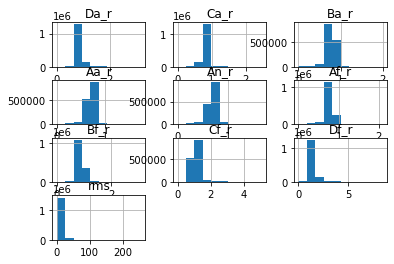

In [31]:
dataset_df.hist(bins=10)

## remove bad data from each row
- we want to train our models, so we will remove negative values, NAN values, masked values such as land mask, etc. 

In [32]:
print('before dropping negative values: (%s, %s)' %dataset_df.shape)

# #- remove/ drop negative values from all input features
# dataset_df.drop((dataset_df[dataset_df['an'] < 0.0].index) | 
#                 (dataset_df[dataset_df['ca'] < 0.0].index) | 
#                 (dataset_df[dataset_df['cf'] < 0.0].index), inplace=True)


      
#- remove/ drop negative values from all input features
dataset_df.drop((dataset_df[dataset_df['Da_r'] < 0.0].index) | 
                (dataset_df[dataset_df['Ca_r'] < 0.0].index) | 
                (dataset_df[dataset_df['Ba_r'] < 0.0].index) |
                (dataset_df[dataset_df['Aa_r'] < 0.0].index) |
                (dataset_df[dataset_df['An_r'] < 0.0].index) |
                (dataset_df[dataset_df['Af_r'] < 0.0].index) |
                (dataset_df[dataset_df['Bf_r'] < 0.0].index) |
                (dataset_df[dataset_df['Cf_r'] < 0.0].index) |
                (dataset_df[dataset_df['Df_r'] < 0.0].index), inplace=True)


print('after dropping negative values: (%s, %s)' %dataset_df.shape)


before dropping negative values: (1510186, 10)
after dropping negative values: (1510186, 10)


<ipython-input-32-59061dbed8dd>:11: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dataset_df.drop((dataset_df[dataset_df['Da_r'] < 0.0].index) |
<ipython-input-32-59061dbed8dd>:11: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dataset_df.drop((dataset_df[dataset_df['Da_r'] < 0.0].index) |
<ipython-input-32-59061dbed8dd>:11: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dataset_df.drop((dataset_df[dataset_df['Da_r'] < 0.0].index) |
<ipython-input-32-59061dbed8dd>:11: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series._

In [33]:
######################################################## another method
# new_df.drop(new_df[new_df[:<0,:]], inplace=True)
# new_df[[' an']] > 1
# new_df[[' ca', ' an']] > 1
# new_df[' an'][1:5]
# new_df[[' an',' ca']].shape
# new_df[[' an',' ca']].head
# print(new_df[new_df[[' an', ' ca', ' cf']] < 0])
# new_df[new_df[' an'] > 1]

## Outliers detection and removal

- identify and remove outliers in dataset

### removal of outliers of reflectance in cameras

In [34]:
cam_outlier = 2.0


if (remove_camera_outlier == True):
    print("removing camera outliers")
    dataset_df.drop(dataset_df[(dataset_df['Da_r'] > cam_outlier) |
                               (dataset_df['Ca_r'] > cam_outlier) |
                               (dataset_df['Ba_r'] > cam_outlier) |
                               (dataset_df['Aa_r'] > cam_outlier) |
                               (dataset_df['An_r'] > cam_outlier) |
                               (dataset_df['Af_r'] > cam_outlier) |
                               (dataset_df['Bf_r'] > cam_outlier) |
                               (dataset_df['Cf_r'] > cam_outlier) |
                               (dataset_df['Df_r'] > cam_outlier)].index, inplace=True)

else:
    print('we did NOT remove camera outliers manually!')

we did NOT remove camera outliers manually!


### Method 1: Manual removal

removing roughness values > 200 cm

In [35]:
if (remove_outlier_manual == True):
    
    dataset_df.drop((dataset_df[dataset_df['rms'] > 200].index), inplace=True)
    print('removing outliers: after dropping values > 200: (%s, %s)' %dataset_df.shape)
else:
    print('we did NOT remove roughness outliers manually!')

we did NOT remove roughness outliers manually!


### Method 2: Interquartile Range Method (IQR)


- Method: find 25 and 75 percentiles in data, calculate inter-quartile range (IQR), set the cut off threshold, and remove outliers from data

In [36]:
#- identify outliers in roughnes valueswith interquartile range (IQRange)
from numpy import percentile

#- extract data 
data = dataset_df.loc[:,'rms']
print(type(data))
#- calculate InterQuartile Range == IQR
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th= %.3f (cm), 75th= %.3f (cm), InterQuartile Range= %.3f (cm)' % (q25, q75, iqr))
#- calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
print('lower cutoff= %.1f, upper cutoff= %.1f' % (lower, upper))
#- identify outliers
outliers = [x for x in data if x > upper] # list comprehension method
print('Identified outliers: %d \n' % len(outliers))
#- remove outliers
remove_outliers_IQR(dataset_df, upper)


<class 'pandas.core.series.Series'>
Percentiles: 25th= 6.940 (cm), 75th= 12.260 (cm), InterQuartile Range= 5.320 (cm)
lower cutoff= -9.0, upper cutoff= 28.2
Identified outliers: 54869 

Removing outliers (IQR method): after dropping roughness values > 28.2 in dataset; new shape= (1455317,10)


what is the difference between & and | and ( | and or) in this condition?


do we need to use & or | here? to remove everty possibility?
we should use | because we should delete any instance of condition < 0.

source: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [37]:
dataset_df.head()

,Da_r,Ca_r,Ba_r,Aa_r,An_r,Af_r,Bf_r,Cf_r,Df_r,rms
1257057,0.87249,0.83727,0.81203,0.78206,0.77496,0.85830,0.97107,1.13248,1.33226,14.17
755698,0.93549,0.85942,0.79738,0.74305,0.73490,0.81504,0.97805,1.30859,2.04983,7.76
394419,0.87493,0.79826,0.73836,0.70002,0.68125,0.77869,0.92045,1.17482,1.56776,7.05
702098,0.82467,0.75572,0.70718,0.66817,0.66273,0.74982,0.91584,1.18438,1.55045,7.48
1207599,0.94814,0.85114,0.77799,0.71658,0.67277,0.76391,0.89573,1.06862,1.35455,21.81


In [38]:
dataset_df.columns

Index(['Da_r', 'Ca_r', 'Ba_r', 'Aa_r', 'An_r', 'Af_r', 'Bf_r', 'Cf_r', 'Df_r',
       'rms'],
      dtype='object')

## check for any NAN values

In [39]:
#~ check all columns all together

# if (dataset_df['an'].isnull().values.any() | 
#     dataset_df['ca'].isnull().values.any() | 
#     dataset_df['cf'].isnull().values.any()):


if (dataset_df['Da_r'].isnull().values.any() | 
    dataset_df['Ca_r'].isnull().values.any() | 
    dataset_df['Ba_r'].isnull().values.any() |
    dataset_df['Aa_r'].isnull().values.any() |
    dataset_df['An_r'].isnull().values.any() |
    dataset_df['Af_r'].isnull().values.any() |
    dataset_df['Bf_r'].isnull().values.any() |
    dataset_df['Cf_r'].isnull().values.any() |
    dataset_df['Df_r'].isnull().values.any()):
    
    print('found NAN in one DF column')

# #~ check each column seperately
# if (new_df[' an'].isnull().values.any()):
#   print('found Nan in AN')
# elif (new_df[' ca'].isnull().values.any()):
#   print('found Nan in CA')
# elif (new_df[' cf'].isnull().values.any()):
#   print('found Nan in CF')

else:
    print('did not find any NAN value in any column\n')


did not find any NAN value in any column



## check for any negative value
values() function comes from numpy and is faster

In [40]:
#~ double check for any negative values in all columns
if ((dataset_df.values < 0).any()):
    print('found some negative values in DF! something is wrong!')
else:
    print('double check: no negative value found anywhere in DF!')

double check: no negative value found anywhere in DF!


## histogram of dataset

defining histogram bins and checking the hostogram of input data again after cleaning dataset

array([[<AxesSubplot:title={'center':'Da_r'}>,
        <AxesSubplot:title={'center':'Ca_r'}>,
        <AxesSubplot:title={'center':'Ba_r'}>],
       [<AxesSubplot:title={'center':'Aa_r'}>,
        <AxesSubplot:title={'center':'An_r'}>,
        <AxesSubplot:title={'center':'Af_r'}>],
       [<AxesSubplot:title={'center':'Bf_r'}>,
        <AxesSubplot:title={'center':'Cf_r'}>,
        <AxesSubplot:title={'center':'Df_r'}>],
       [<AxesSubplot:title={'center':'rms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

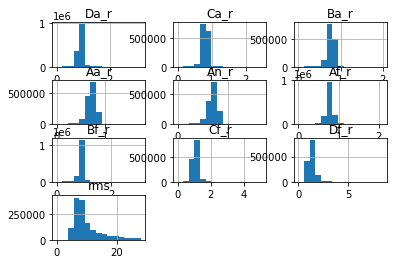

In [41]:
dataset_df.hist(bins=15)

### Generate descriptive statistics of dataset

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [42]:
dataset_df.describe()

,Da_r,Ca_r,Ba_r,Aa_r,An_r,Af_r,Bf_r,Cf_r,Df_r,rms
count,1.455317e+06,1.455317e+06,1.455317e+06,1.455317e+06,1.455317e+06,1.455317e+06,1.455317e+06,1.455317e+06,1.455317e+06,1.455317e+06
mean,8.909667e-01,8.171562e-01,7.615126e-01,7.149839e-01,6.896958e-01,7.713443e-01,9.066766e-01,1.122584e+00,1.451024e+00,1.002470e+01
std,1.768397e-01,1.361870e-01,1.248050e-01,1.239875e-01,1.218428e-01,1.314093e-01,1.816225e-01,3.462114e-01,6.561437e-01,4.815787e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.456000e-01,7.772900e-01,7.127500e-01,6.587700e-01,6.337300e-01,7.226600e-01,8.590200e-01,9.711200e-01,1.102900e+00,6.890000e+00
50%,8.744500e-01,8.205900e-01,7.731700e-01,7.252600e-01,7.013700e-01,7.867300e-01,8.948000e-01,1.082100e+00,1.341080e+00,8.290000e+00
75%,9.146600e-01,8.574200e-01,8.254200e-01,7.903800e-01,7.631500e-01,8.339800e-01,9.363000e-01,1.162150e+00,1.562150e+00,1.153000e+01
max,3.185980e+00,2.488320e+00,2.011580e+00,1.744150e+00,1.662750e+00,2.104610e+00,3.116210e+00,5.127800e+00,8.499820e+00,2.822000e+01


# Split dataset to train-test parts for training algorithms



- we devided to plit our dataset to 2 parts (2-part split)
- Here we use the ‘train_test_split’ to split the data in 80:20 ratio i.e. 80% of the data will be used for training the model while 20% will be used for testing the model that is built out of it.

source: https://towardsdatascience.com/splitting-a-dataset-e328dab2760a

In [43]:
# print(new_df.head)

X = dataset_df.iloc[:, :-1] # to select up to last column of dataset OR [:, 0:3]
Y = dataset_df.iloc[:, -1:] # to select last column of DF

print(X.shape)
print(Y.shape)

(1455317, 9)
(1455317, 1)


In [44]:
# print(X.head)
# print(Y.head)

#~ Q- what happened to Y columns?
# print(type(X))
# print(type(Y))

questions:

Q- how devide dataset for train-test step?

Q- how about train-val-test (3 sections)? is this for DL?

In [45]:
##- split data set to X and Y
from sklearn.model_selection import train_test_split

#~ we use this function to split data-- from here because we are usiong SKlearn library, we change all data structures from Pandas DF to numpy
# X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, random_state=123) # Q- input is DF or numpy array?

test_data_size = 0.3
print("test size= %d percent" %(test_data_size*100))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_data_size, random_state=123) # Q- input is DF or numpy array?

print("train:")
print(X_train.shape)
print(y_train.shape)
print("test:")
print(X_test.shape)
print(y_test.shape)


test size= 30 percent
train:
(1018721, 9)
(1018721, 1)
test:
(436596, 9)
(436596, 1)


## Feature scalling
this step should be done after splitting data to train-test

### Using MinMaxScaler method to rescale data

In [46]:
##- import necessary libraries for Neural Nets
from sklearn.preprocessing import MinMaxScaler

In [47]:
# # fit data
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()

# scaler_x.fit(X_train) # returns Fitted scaler
# X_train_scaled = scaler_x.transform(X_train)  # transforms data

# scaler_x.fit(X_test)
# X_test_scaled = scaler_x.transform(X_test)

# scaler_y.fit(y_train)
# y_train_scaled = scaler_y.transform(y_train)

# scaler_y.fit(y_test)
# y_test_scaled = scaler_y.transform(y_test)

Check types of input dataset data structure; should be 2D arrays, or Pandas DataFrame

In [48]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

# print('\n')
# print(X_train.head)
# print('\n')
# print(y_train.head)
# print(X_test.head)
# print(y_test.head)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Investigate different ML algorithms for our regression problem (linear vs. nonlinear)


Algorithms implemented:

1- Multiple Linear Regression

2- SVM (SVR)

3- Polynomial Linear Regression

4- Decision Tree

5- Random Forest

6- Neural Networks

source: https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/

# 1- Multiple Linear Regression


we will implement some regression models and will try them on our dataset.

source: https://medium.com/analytics-vidhya/5-regression-algorithms-you-need-to-know-theory-implementation-37993382122d

here we use a linear regression model to test our hypothesis



In [49]:
from sklearn.metrics import r2_score  

In [50]:
if (multiple_linear_regression == True):
    
    from sklearn.linear_model import LinearRegression

    ##- Create linear regression object 
    mlr_model = LinearRegression() # create an estimator obj
    ##- Train the model using the training sets
    ##- here we use X_train(3 features)
    mlr_model.fit(X_train, y_train) # fit(X,y) will fit data to our algortihm and makes it learn from data == training step


#     mlr_model_score = mlr_model.score(X_test, y_test) # R2  of self.predict(X) wrt. y.
#     print('Accuracy (R2 of prediction): %.1f percent' %(mlr_model_score*100)) # shows the strength of linear relationship between 2 variables: observations and predictions

    print('Intercept: %.2f' %mlr_model.intercept_)
    print('model coefficients: %s' %mlr_model.coef_)     # ???? Estimated coefficients for the linear regression problem

    #~ Predict using the linear model
    y_pred_mlr = mlr_model.predict(X_test)
#     y_predict_mlr_original = scaler_y.inverse_transform(y_pred_mlr)
    
    ##- here we use X_test w/3 features
    """Return the coefficient of determination (R2)  of the prediction; relative measure of how well the model fits dependent variables
    """ 
    mlr_model_score = r2_score(y_test, y_pred_mlr)
    print('Accuracy (R2 of prediction): %.1f percent' %(mlr_model_score*100)) # shows the strength of linear relationship between 2 variables: observations and predictions
    
    
    # report accuracy/ model performance/ error metrics on test data
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math

    # print('Test MSE: %.2f' %mean_squared_error(y_test, y_predict_mlr)) # absolute number on how much predicted results deviate from the actual number
    print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_mlr))) # square root of MSE.
    # print('Test MAE: %.2f' %mean_absolute_error(y_test, y_predict_mlr))



Intercept: 6.17
model coefficients: [[  5.88532941   9.7051579   11.49952817 -24.88472811  20.86841346
  -19.68718579   5.36657247   0.12610504  -3.10143812]]
Accuracy (R2 of prediction): 5.1 percent
Test RMSE: 4.70


prepare train and test datasets in a 2D array format


In [51]:
# import numpy as np

# an_train = X_train[:,0]

# an_test = X_test[:,0]
# ca_test = X_test[:,1]
# cf_test = X_test[:,2]


# print(an_train.shape)
# print(an_test.shape)

# #~ reshape to 2d
# an_train = np.reshape(an_train, (an_train.size, 1))
# an_test = np.reshape(an_test, (an_test.size, 1))
# print('after reshapping')
# print(an_train.shape)
# print(an_test.shape)


Train the model by fitting data to it. Algorithm is fit on the trining dataset to get our trained model

In [52]:
# fit the linear model
# linear_regr.fit(AN_train, y_train) # fit(X,y) will fit data to our algortihm and makes it learn from data == training step
# here the model learns/finds the mapping f(.) between input and output 
# Q- X == input array, how many features can LinearRegression() use? can we use X(an, ca, cf)?




# Q- how about evaluation step?
# Q- how about test step?
# Q- accuracy? score? how we know that our model is up to the desired accuracy/score?

## Model score

In [53]:
# #-- here we use X_test w/3 features
# """Return the coefficient of determination (R2)  of the prediction; relative measure of how well the model fits dependent variables
# """ 
# mlr_model_score = mlr_model.score(X_test, y_test) # R2  of self.predict(X) wrt. y.
# print('Accuracy (R2 of prediction): %.1f percent' %(mlr_model_score*100)) # shows the strength of linear relationship between 2 variables: observations and predictions


## intercept and coefficient???

In [54]:
# print('Intercept: %.2f' %mlr_model.intercept_)
# print('model coefficients: %s' %mlr_model.coef_)     # ???? Estimated coefficients for the linear regression problem


## Model prediction

here we use test portion of data as the future/unseen data by making predictions on the test dataset

we use model fit and make predictions on test data set and evaluate the model skill by measuring how well the model performs on prediction

In [55]:
# #~ Predict using the linear model.
# # predict_an_test = linear_regr.predict(an_test)

# y_pred_mlr = mlr_model.predict(X_test)


In [56]:
# print(X_test[:,0])
# print('X_test shape: (%s,%s)' %X_test.shape)
# print('y_predicted shape: (%s,%s)' %y_predict_mlr.shape)

# print(type(X_test))
# y_predict_mlr[:10,0]

Q- how evaluate performance metrics/skill/score of the trained model?

## plot predictions for each attribute
Plot outputs for prediction on test dataset

ref1:
https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/

ref2:
https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/#:~:text=A%20regression%20problem%20is%20when,which%20goes%20through%20the%20points.

### plotting scatter(y-test, y-pred). It is not the same as plotting a best fit line, but it shows you how well the model works.

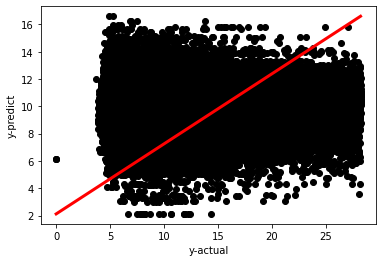

In [57]:
# fig, ax = plt.subplots()
# # y_test_sorted = np.sort(y_test)
# # y_predict_mlr_sorted = np.sort(y_predict_mlr)

# ax.scatter(y_test, y_predict_mlr, color='g') #, edgecolors=(0, 0, 1))
# ax.plot([y_test.min(), y_test.max()], [y_predict_mlr.min(), y_predict_mlr.max()], 'k--', lw=3) # order= ax.plot(x, y)

# # ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3) # changed to test range for better plot
# ## tested with sorted values
# # ax.plot(y_test_sorted, y_predict_mlr_sorted, color='red', linewidth=3) # for score inputs & error metrics Q- sort values before line?
# # ax.plot(y_test, y_predict_mlr, color='red', linewidth=3) # for score inputs & error metrics Q- sort values before line?
# ax.set_xlabel('Measured roughness (y-test, obs)')
# ax.set_ylabel('Predicted roughness (y-predict)')
# plt.show()

################################################

if (multiple_linear_regression == True):
    
    plt.scatter(y_test, y_pred_mlr, color='black')
    plt.plot([y_test.min(), y_test.max()], [y_pred_mlr.min(), y_pred_mlr.max()], 'red', lw=3) # order= ax.plot(x, y)
    plt.xlabel("y-actual")
    plt.ylabel("y-predict")
    plt.show()




In [58]:
# plt.scatter(X_test[:,0], y_test)

plot each cam seperately

In [59]:
# fig, axs = plt.subplots(1,2)

# axs[0].scatter(X_test[0], y_test, color='g') #, edgecolors=(0, 0, 1))
# # axs[0].plot([y_test.min(), y_test.max()], [y_predict_mlr.min(), y_predict_mlr.max()], 'k--', lw=3) # order= ax.plot(x, y)
# # ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3) # changed to test range for better plot

# axs[0].set_xlabel('Actual (y-test, obs) roughness')
# axs[0].set_ylabel('Predicted roughness')

# plt.show()

In [60]:
#~ old 
# plt.scatter(an_test, y_test,  color='black') 
# plt.title('Test Data') 
# plt.xlabel('an') 
# plt.ylabel('rms') 
# plt.xticks(()) 
# plt.yticks(()) 
#~ plot prediction line - Q- can we plot the prediction?
# plt.plot(an_test, predict_X_test, color='red', linewidth=3) # plots regression line?
# plt.plot(an_test, predict_an_test, color='red', linewidth=3) # plots regression line?

## Report error metrics on test data


Q- performance metrics/stats on test data? like prediction accuracy? regression error?

source: https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

In [61]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import math

# # print('Test MSE: %.2f' %mean_squared_error(y_test, y_predict_mlr)) # absolute number on how much predicted results deviate from the actual number
# print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_mlr))) # square root of MSE.
# # print('Test MAE: %.2f' %mean_absolute_error(y_test, y_predict_mlr))


# 2- Support Vector Regression (svm.svr)

In [62]:
# # import numpy as np
# from sklearn.svm import SVR
# import matplotlib.pyplot as plt

In [63]:
if (SVM == True):
    
    # import numpy as np
    from sklearn.svm import SVR
    import matplotlib.pyplot as plt

    # build/initiate regression model
    svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1, degree=3) # radial basis function kernel
    svr_lin = SVR(kernel='linear', C=100, gamma='auto')
    svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
    
    
    from numpy import ravel
    y_train_list = ravel(y_train)

#     print(type(y_train_list))
#     print(y_train_list[1:10])


    svr_rbf.fit(X_train, y_train_list)
    svr_lin.fit(X_train, y_train_list)
    svr_poly.fit(X_train, y_train_list)

    ##- reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

    #~ here we use X_test w/3 features
    ## Return the coefficient of determination (R2)  of the prediction; 
    ## relative measure of how well the model fits dependent variables
    ## regression model score

    y_rbf_pred = svr_rbf.predict(X_test)
    y_lin_pred = svr_lin.predict(X_test)
    y_poly_pred = svr_poly.predict(X_test)

    rbf_score = r2_score(y_test, y_rbf_pred)*100
    linear_score = r2_score(y_test, y_lin_pred)*100
    poly_score = r2_score(y_test, y_poly_pred)*100

    print("R2 rbf= %.2f percent" %rbf_score)
    print("R2 linear= %.2f percent" %linear_score)
    print("R2 poly= %.2f percent" %poly_score)


    # print(svr_rbf.score(X_test, y_test)*100) 
    # # print(svr_lin.score(X_test, y_test)*100)
    # # print(svr_poly.score(X_test, y_test)*100)

    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math
    print("\n")
    print('rbf kernel')
    print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_rbf_pred))) # square root of MSE.

    print('linear kernel')
    print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_lin_pred))) # square root of MSE.

    print('poly kernel')
    print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_poly_pred))) # square root of MSE.
    

In [64]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import math
# print('rbf kernel ...')
# # print('MSE: %.2f' %mean_squared_error(y_test, y_rbf_predicted)) # absolute number on how much predicted results deviate from the actual number
# print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_rbf_predicted))) # square root of MSE.
# # print('Test MAE: %.2f' %mean_absolute_error(y_test, y_rbf_predicted))

# # print('linear kernel ...')
# # # print('MSE: %.2f' %mean_squared_error(y_test, y_lin_predicted)) # absolute number on how much predicted results deviate from the actual number
# # print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_lin_predicted))) # square root of MSE.
# # # print('Test MAE: %.2f' %mean_absolute_error(y_test, y_lin_predicted))

# # print('poly kernel ...')
# # # print('MSE: %.2f' %mean_squared_error(y_test, y_poly_predicted)) # absolute number on how much predicted results deviate from the actual number
# # print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_poly_predicted))) # square root of MSE.
# # # print('Test MAE: %.2f' %mean_absolute_error(y_test, y_poly_predicted))


# 3- Polynomial linear regression

- Although this model allows for a nonlinear relationship between Y and X, polynomial regression is still considered linear regression since it is linear in the regression coefficients

In [65]:
if (polynomial == True):
    
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math

    polynomial_features = PolynomialFeatures(degree=3) # what degree is suitable for my problem?
    X_train_transformed = polynomial_features.fit_transform(X_train)

    # plRegressor = LinearRegression()
    # print(polynomial_features)

    print(X_train.shape)
    print(X_train_transformed.shape) # Q- why degree= 3, 3 features turned to 20 features?

    # from sklearn.pipeline import Pipeline
    # plr_model = Pipeline(steps= [('polyFeatures', polynomial_features), ('regressor', plRegressor)])
    model_name = 'Polinomial Linear Regression '
    print('model: %s' %model_name)
    poly_linear_reg_model = LinearRegression(polynomial_features)
    print(poly_linear_reg_model)

    poly_linear_reg_model.fit(X_train, y_train)

    y_pred_plr = poly_linear_reg_model.predict(X_test)

    score_plr = r2_score(y_test, y_pred_plr)
    print("accuracy: %.2f percent" %(score_plr*100))

    print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_plr))) # square root of MSE.


In [66]:
# print('Test MSE: %.2f' %mean_squared_error(y_test, y_predict_plr)) # absolute number on how much predicted results deviate from the actual number
# print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_plr))) # square root of MSE.
# print('Test MAE: %.2f' %mean_absolute_error(y_test, y_predict_plr))


# 4- Decision Tree (Regression)


source: https://gdcoder.com/decision-tree-regressor-explained-in-depth/

sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree#sklearn.tree.DecisionTreeRegressor

tree: https://scikit-learn.org/stable/modules/tree.html

In [67]:
if (decision_tree == True):
    
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math
    from sklearn import tree

    # Q- how tune DT alg? which param is most effective?
    DT_model = tree.DecisionTreeRegressor(max_features='auto', 
                                          min_samples_split=10, 
                                          min_samples_leaf=20, 
                                          max_depth=4, 
                                          criterion='mse', 
                                          random_state=0) # criterion= for feature selection= MAE, MSE, ... differs from classification

    # dtree_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', DTRegressor)])  # we preprocessed data ourselves! 
    # DT_model = Pipeline(steps=[('regressor', DT_regressor)])

    print(DT_model)
    # print(X_train.head)

    DT_model.fit(X_train, y_train) # train the model

    y_pred_dtree = DT_model.predict(X_test)

    # score_dtree = DT_model.score(X_test, y_test)  # Return the coefficient of determination (R2) of the prediction
    score_dtree = r2_score(y_test, y_pred_dtree)

    print('\nDecisionTree accuracy: %.2f percent' %(score_dtree*100))

    print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_dtree))) # square root of MSE.



In [68]:
# import graphviz 

# # dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=X_train.columns) 
# dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, rounded=True, feature_names=X_train.columns) 
# graph = graphviz.Source(dot_data) 
# graph

plot using subplots()

source: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

### Use prediction on test data and plot them

In [69]:
# fig, ax = plt.subplots()

# ax.scatter(y_test, y_predict_dtree, edgecolors=(0, 0, 1))
# # ax.plot([y_test.min(), y_test.max()], [y_predict_dtree.min(), y_predict_dtree.max()], 'r--', lw=3)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3) # changed to test range for better plot

# ax.set_xlabel('Actual (y-test, obs) roughness')
# ax.set_ylabel('Predicted roughness')

# plt.show()  


### Report error metrics on test data

In [70]:
# print('Test MSE: %.2f' %mean_squared_error(y_test, y_predict_dtree)) # absolute number on how much predicted results deviate from the actual number
# print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_predict_dtree))) # square root of MSE.
# print('Test MAE: %.2f' %mean_absolute_error(y_test, y_predict_dtree))


# 5- Random Forest

In [71]:
if (random_forest == True):
    
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math
    from sklearn import tree
    from sklearn.ensemble import RandomForestRegressor
    # from sklearn.pipeline import Pipeline
    
    from numpy import ravel
    y_train_list = ravel(y_train)

    rfr_model = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=0, max_features='auto', min_samples_split=10, min_samples_leaf=20, criterion='mse')

    # rfr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', RandomForestRegressor)])  # we preprocessed data ourselves! 

    rfr_model.fit(X_train, y_train_list) # train the model

    print(rfr_model)

    y_pred_rfr = rfr_model.predict(X_test)

    # score_rfr = rfr_model.score(X_test, y_test)  # Return the coefficient of determination (R2) of the prediction
    score_randomForest = r2_score(y_test, y_pred_rfr)
    print('\n RandomForest accuracy: %.2f percent' %(score_randomForest*100))

    print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_rfr))) # square root of MSE.



### Report error metrics on test data

In [72]:
# print('Test MSE: %.2f' %mean_squared_error(y_test, y_predict_rfr)) # absolute number on how much predicted results deviate from the actual number
# print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_predict_rfr))) # square root of MSE.
# print('Test MAE: %.2f' %mean_absolute_error(y_test, y_predict_rfr))


# 6- Neural Network (Regression)

### Normalizing data as an important step

- We rescale data after we split data to train-test
- all features have the same scale to reduce bias in data 
- perform this step before splitting data into train-test split
- We normalize data using the training data

### Neural Network Configuration
we only use 1 hidden layer because a single hidden layer is suitable for most data sets

source: https://keras.io/api/models/model_training_apis/#evaluate-method

In [73]:
#-- implementation-1

# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense
# model = Sequential()
# model.add(Dense(3, input_dim=3, kernel_initializer='normal', activation='relu'))  #, name='input layer'))
# model.add(Dense(878, activation='relu')) #, name='hidden layer-1'))
# model.add(Dense(1, activation='linear')) #, name='output layer'))
# model.summary()

### Building the NN model

In [74]:
##- implementation-2
##- from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import layers

if (train_MLP==True):
    
    # Define Sequential model with 3 layers
    mlp_model = tf.keras.Sequential(
           [
            # hidden layers
            layers.Dense(9, input_dim=9, activation="relu", kernel_initializer='normal', name="hidden-layer-1"), # input_dim=3 == input shape will build our model automatically
            layers.Dense(9, activation="relu", kernel_initializer='normal', name="hidden-layer-2"),  # name should be attached; one single word!
            layers.Dense(9, activation="relu", kernel_initializer='normal', name="hidden-layer-3"),  # name should be attached; one single word!
            #layers.Dense(9, activation="relu", kernel_initializer='normal', name="hidden-layer-4"),  # name should be attached; one single word!

            # output layer
            layers.Dense(1, activation='linear', kernel_initializer='normal', name="output-layer-SIR"),  # linear activation?
          ]
        )

    mlp_model.summary()


## plot model

In [75]:
if (train_MLP==True):
    
    from tensorflow.keras.utils import plot_model

    plot_model(mlp_model, to_file='model.png', show_shapes=True, show_layer_names=True)


### Training the NN model

In [76]:
if (train_MLP==True):
    
    ##- compile model
    mlp_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

    ##- train the network
    train_history = mlp_model.fit(X_train, 
                                  y_train, 
                                  epochs=50,
                                  batch_size=100, 
                                  verbose=1, 
                                  validation_split=0.2)


# save the trained model

In [77]:
if (train_MLP==True):
    # save model and architecture to single file
    model_name = "trained_model_3L9N_50epoch.h5"
    
    model_fp = os.path.join(dataset_dir, model_name) 
    mlp_model.save(model_fp)

### Training error

In [78]:
if (train_MLP==True):

    print(train_history.history.keys())
    print('\n')
    # print("-> model: %s" % train_model)
    print("Training Loss: %.2f" % train_history.history['loss'][-1])  # will return the loss in the last training epoch
    print("Training MSE: %.2f (cm^2 roughness)" % (train_history.history['mse'][-1]))
    print("Training MAE: %.2f (cm roughness)" % (train_history.history['mae'][-1]))


In [79]:
# print(train_history.history)

## Plot loss of training

In [80]:
if (train_MLP==True):

    print(train_history.history.keys())
    # "Loss" val==validation==test
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


### Testing the NN model and report error 

In [81]:
# print(mlp_model.metrics_names)


In [82]:
if (train_MLP==True):
    
    ## Returns the loss value & metrics values for the model in test mode.
    ## similar to test 

    test_metrics = mlp_model.evaluate(X_test, y_test, batch_size=20, verbose=1) # Returns the loss value & metrics values for the model in test mode


In [83]:
if (train_MLP==True):
    
    # print(test_metrics)
    import math

    mse_test = test_metrics[1]
    print("Test RMSE: %.2f (cm roughness)" %math.sqrt(mse_test))
#     print("Test MAE: %.2f (cm roughness)" %(test_metrics[2]))


# model prediction 

In [84]:
if (train_MLP==True):
    
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    y_pred_mlp = mlp_model.predict(X_test)  # Generates output predictions for the input samples


In [85]:
## scale back the predictions

# if (train_MLP==True):
    
#     y_pred_ann_original = scaler_y.inverse_transform(y_pred_ann_scaled)

#     print('Test RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, y_pred_ann_original))) # square root of MSE.

In [86]:
if (train_MLP==True):
    
    if (multiple_linear_regression == True):

        plt.scatter(y_test, y_pred_mlp, color='black')
        plt.plot([y_test.min(), y_test.max()], [y_pred_mlp.min(), y_pred_mlp.max()], 'red', lw=3) # order= ax.plot(x, y)
        plt.xlabel("y-actual")
        plt.ylabel("y-predict")
        plt.show()
    

# Load the model to predict SIRoughness values for a path of blocks

In [4]:
from keras.models import load_model

model_name = "trained_model_2L50N_100epoch.h5"
model_dir = '/home/ehsan/misr_lab/MISR-roughness/prediction_MLP'

model_fp = os.path.join(model_dir, model_name) 

# load model
mlp_model_best = load_model(model_fp)
# summarize model.
mlp_model_best.summary()




# best_model.predict(misr_block_in_for_loop)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden-layer-1 (Dense)       (None, 50)                500       
_________________________________________________________________
hidden-layer-2 (Dense)       (None, 50)                2550      
_________________________________________________________________
output-layer-SIR (Dense)     (None, 1)                 51        
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


# evaluate model

In [5]:
test_metrics = mlp_model_best.evaluate(X_test, y_test, batch_size=20, verbose=1) # Returns the loss value & metrics values for the model in test mode

import math

mse_test = test_metrics[1]
print("Test RMSE: %.2f (cm roughness)" %math.sqrt(mse_test))
#     print("Test MAE: %.2f (cm roughness)" %(test_metrics[2]))


NameError: name 'X_test' is not defined

# get a list of toa_refl files

In [6]:
from glob import glob

toa_refl_dir = "/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25"
toa_refl_filePattern = "toa_refl_P*.dat"

toa_refl_list = glob(os.path.join(toa_refl_dir, toa_refl_filePattern))

In [7]:
len(toa_refl_list)

7388

In [8]:
def remove_black_regions(in_arr, cam_name):
    print("trimming camera: %s" %cam_name)
    
    for i in range(2048):
        if (in_arr[0,i] != -1.0):
            colL1 = i
#             print("colL1: %s" %colL1)
            break
            
    for i in range(2048):
        if (in_arr[511,i] != -1.0):
            colL2 = i
#             print("colL2: %s" %colL2)
            break
        
    cut_left = max(colL1, colL2)
    
#     print("cut-left: %s" %cut_left)
    if (cut_left != 0.0):
        in_arr = np.delete(in_arr, slice(0, cut_left), 1)
#         print(in_arr.shape)
    
#     print(in_arr.shape)

        
        
    for j in range(in_arr.shape[1]):
        if(in_arr[0,j] == -1.0):
            colR1 = j
#             print("colR1: %s" %colR1)
            break
        else:
            colR1 = in_arr.shape[1]
            
    for j in range(in_arr.shape[1]):
        if(in_arr[511,j] == -1.0):
            colR2 = j
#             print("colR2: %s" %colR2)
            break
        else:
            colR2 = in_arr.shape[1]
        
    cut_right = min(colR1, colR2)

#     print("cut-right: %s" %cut_right)

    if (cut_right != 0.0):
        in_arr = np.delete(in_arr, slice(cut_right, in_arr.shape[1]), 1)

#     print("shape after trimming:")
#     print(in_arr.shape)
    arr_shape = in_arr.shape

    return in_arr, arr_shape


In [9]:
# da_r_arr = np.fromfile(os.path.join(toa_refl_dir, da_r), dtype=np.double)[0:1048576].reshape((512,2048))
# np.median(da_r_arr)

In [10]:
if (mlp_ann_predict==True):
    ## order of neurons is important
    # open toa_refl.dat
    import numpy as np
    import os
    from PIL import Image
    from datetime import datetime

    t1 = datetime.now()

    # image_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research"
    image_dir = toa_refl_dir

    p_o_process_list = []

    for toa_refl in toa_refl_list:
        #print(toa_refl)
        file_name = toa_refl.split('/')[-1]
        #print(file_name.split('_')[2:4])
        p_o_list = file_name.split('_')[2:4]
        p_o = p_o_list[0]+"_"+p_o_list[1]
        #print(p_o)

        if p_o in p_o_process_list:
            continue
        else:
            p_o_process_list.append(p_o)
            print("added to list")

            for toa_block in range(1,47,1):  # check this number later

                if (toa_block < 10):
                    toa_block = str(toa_block).rjust(2,'0')
                else:
                    toa_block = str(toa_block)

                print(p_o)
                print(toa_block)
                
                ## check output on disk
#                 out_img_label = p_o+'_'+'B0'+toa_block+".tif"  # this image format supports saving neg- values in image
#                 out_img_fullpath = os.path.join(image_dir, out_img_label)



                out_raw_binary_label = 'roughness_toa_refl_'+p_o+'_'+'B0'+toa_block+".dat"  # this image format supports saving neg- values in image
                out_raw_binary_fullpath = os.path.join(image_dir, out_raw_binary_label)


                if (os.path.isfile(out_raw_binary_fullpath)==True):
                    print(out_raw_binary_fullpath)
                    print("binary exists- continue")
                    continue

                ## define and open 9 cameras in order
                ## based on order of input to MLP- based on order of cameras in training dataset
                ## path,orbit,block,line,sample,lat,lon,Da_r,Ca_r,Ba_r,Aa_r,An_r,An_g,An_b,An_nir,Af_r,Bf_r,Cf_r,Df_r,mean_ATM_roughness

                
                da_r = "toa_refl_"+p_o+"_B0"+toa_block+"_da_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, da_r))==False):
                    print("block not found- continue")
                    continue
                ## read array
                da_r_arr = np.fromfile(os.path.join(toa_refl_dir, da_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(da_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
                
                ca_r = "toa_refl_"+p_o+"_B0"+toa_block+"_ca_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, ca_r))==False):
                    print("block not found- continue")
                    continue
                ca_r_arr = np.fromfile(os.path.join(toa_refl_dir, ca_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(ca_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
                
                ba_r = "toa_refl_"+p_o+"_B0"+toa_block+"_ba_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, ba_r))==False):
                    print("block not found- continue")
                    continue
                ba_r_arr = np.fromfile(os.path.join(toa_refl_dir, ba_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(ba_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
                
                aa_r = "toa_refl_"+p_o+"_B0"+toa_block+"_aa_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, aa_r))==False):
                    print("block not found- continue")
                    continue
                aa_r_arr = np.fromfile(os.path.join(toa_refl_dir, aa_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(aa_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
                
                an_r = "toa_refl_"+p_o+"_B0"+toa_block+"_an_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, an_r))==False):
                    print("block not found- continue")
                    continue
                an_r_arr = np.fromfile(os.path.join(toa_refl_dir, an_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(an_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
   

                af_r = "toa_refl_"+p_o+"_B0"+toa_block+"_af_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, af_r))==False):
                    print("block not found- continue")
                    continue
                af_r_arr = np.fromfile(os.path.join(toa_refl_dir, af_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(af_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
                
                
                bf_r = "toa_refl_"+p_o+"_B0"+toa_block+"_bf_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, bf_r))==False):
                    print("block not found- continue")
                    continue
                bf_r_arr = np.fromfile(os.path.join(toa_refl_dir, bf_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(bf_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
            
                
                cf_r = "toa_refl_"+p_o+"_B0"+toa_block+"_cf_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, cf_r))==False):
                    print("block not found- continue")
                    continue
                cf_r_arr = np.fromfile(os.path.join(toa_refl_dir, cf_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(cf_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
                
                
                df_r = "toa_refl_"+p_o+"_B0"+toa_block+"_df_red.dat"
                ## check file available
                if (os.path.isfile(os.path.join(toa_refl_dir, df_r))==False):
                    print("block not found- continue")
                    continue
                df_r_arr = np.fromfile(os.path.join(toa_refl_dir, df_r), dtype=np.double)[0:1048576].reshape((512,2048))
                ## check black- continue:
                if (np.median(df_r_arr) == -1.0):
                    print("image black- continue")
                    continue
                
                
                print("removing black regions")

                ## trim 9 images and get final shape
                da_noBlack, da_shape = remove_black_regions(da_r_arr, 'da')
                ca_noBlack, ca_shape = remove_black_regions(ca_r_arr, 'ca')
                ba_noBlack, ba_shape = remove_black_regions(ba_r_arr, 'ba')
                aa_noBlack, aa_shape = remove_black_regions(aa_r_arr, 'aa')
                an_noBlack, an_shape = remove_black_regions(an_r_arr, 'an')
                af_noBlack, af_shape = remove_black_regions(af_r_arr, 'af')
                bf_noBlack, bf_shape = remove_black_regions(bf_r_arr, 'bf')
                cf_noBlack, cf_shape = remove_black_regions(cf_r_arr, 'cf')
                df_noBlack, df_shape = remove_black_regions(df_r_arr, 'df')

                shape_list = [da_shape[1], ca_shape[1], ba_shape[1], 
                              aa_shape[1], an_shape[1], af_shape[1], 
                              bf_shape[1], cf_shape[1], df_shape[1]]

                min_col = min(shape_list)
                print(min_col)

                ## trip all 9 images based on min-column
                da_noBlack_trim = np.delete(da_noBlack, slice(min_col, da_noBlack.shape[1]), 1)
                print(da_noBlack_trim.shape)

                ca_noBlack_trim = np.delete(ca_noBlack, slice(min_col, ca_noBlack.shape[1]), 1)
                print(ca_noBlack_trim.shape)

                ba_noBlack_trim = np.delete(ba_noBlack, slice(min_col, ba_noBlack.shape[1]), 1)
                print(ba_noBlack_trim.shape)

                aa_noBlack_trim = np.delete(aa_noBlack, slice(min_col, aa_noBlack.shape[1]), 1)
                print(aa_noBlack_trim.shape)

                an_noBlack_trim = np.delete(an_noBlack, slice(min_col, an_noBlack.shape[1]), 1)
                print(an_noBlack_trim.shape)

                af_noBlack_trim = np.delete(af_noBlack, slice(min_col, af_noBlack.shape[1]), 1)
                print(af_noBlack_trim.shape)

                bf_noBlack_trim = np.delete(bf_noBlack, slice(min_col, bf_noBlack.shape[1]), 1)
                print(bf_noBlack_trim.shape)

                cf_noBlack_trim = np.delete(cf_noBlack, slice(min_col, cf_noBlack.shape[1]), 1)
                print(cf_noBlack_trim.shape)

                df_noBlack_trim = np.delete(df_noBlack, slice(min_col, df_noBlack.shape[1]), 1)
                print(df_noBlack_trim.shape)



                ## loop and extract 9 cameras for each row & column, based on order of cameras (important)

                x_predict_block = []

                for row in range(da_noBlack_trim.shape[0]):
                    for col in range(da_noBlack_trim.shape[1]):

                        x1 = da_noBlack_trim[row,col]
                        x2 = ca_noBlack_trim[row,col]
                        x3 = ba_noBlack_trim[row,col]
                        x4 = aa_noBlack_trim[row,col]
                        x5 = an_noBlack_trim[row,col]
                        x6 = af_noBlack_trim[row,col]
                        x7 = bf_noBlack_trim[row,col]
                        x8 = cf_noBlack_trim[row,col]
                        x9 = df_noBlack_trim[row,col]

                        nine_features = [x1,x2,x3,x4,x5,x6,x7,x8,x9]
                        #print(type(nine_features))
                        x_predict_block.append(nine_features)


                x_predict_block[0]
                
                ## prediction for each block
                y_predict_block = mlp_model_best.predict(x_predict_block, verbose=1)


                
                ## re-construct images to 2D
                print(y_predict_block.shape)
                print(type(y_predict_block))

                y_predict_block_2d = y_predict_block.reshape((512,-1))
                print(y_predict_block_2d.dtype)
                print(y_predict_block_2d.shape)

                print("min: %s" %y_predict_block_2d.min())
                print("max: %s" %y_predict_block_2d.max())

                
                ## flatten array and save as binary raw file
                y_predict_block_2d.flatten().astype(np.double).tofile(out_raw_binary_fullpath)
                print(out_raw_binary_fullpath)
                
                y_predict_block_2d = None
#                 print(len(y_predict_block_2d))


#                 ##- create PIL image from predicted roughness array 2D w/ negative values
#                 predicted_roughness_img = Image.fromarray(y_predict_block_2d)
#                 ##- save roughness PIL image on disc
#                 predicted_roughness_img.save(out_img_fullpath)  
#                 print("predicted image saved to:")
#                 print(out_img_fullpath)

            



    t2 = datetime.now()
    period = t2-t1
    print("run time: %s" %period)







added to list
P091_O086991
01
block not found- continue
P091_O086991
02
block not found- continue
P091_O086991
03
block not found- continue
P091_O086991
04
image black- continue
P091_O086991
05
block not found- continue
P091_O086991
06
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P091_O086991_B006.dat
binary exists- continue
P091_O086991
07
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P091_O086991_B007.dat
binary exists- continue
P091_O086991
08
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P091_O086991_B008.dat
binary exists- continue
P091_O086991
09
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P091_O086991_B009.dat
binary exist

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1398
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
22368/22368 [==============================] - 15s 684us/step
(715776, 1)
<class 'numpy.ndarray'>
float32
(512, 1398)
min: -80.89666
max: 44.610355
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P212_O086984_B019.dat
P212_O086984
20
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1398
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
22368/22368 [==============================] -

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1379
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
22064/22064 [==============================] - 14s 645us/step
(706048, 1)
<class 'numpy.ndarray'>
float32
(512, 1379)
min: -74.496376
max: 102.39217
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P212_O086984_B032.dat
P212_O086984
33
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1376
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
22016/22016 [==============================] 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1358
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
21728/21728 [==============================] - 15s 710us/step
(695296, 1)
<class 'numpy.ndarray'>
float32
(512, 1358)
min: -54.76357
max: 51.12478
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P212_O086984_B045.dat
P212_O086984
46
block not found- continue
added to list
P228_O086985
01
block not found- continue
P228_O086985
02
block not found- continue
P228_O086985
03
block not found- continue
P228_O086985
04
block not found- continue
P228_O086985
05
image black- continue
P228_O086985
06
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: a

22304/22304 [==============================] - 16s 699us/step
(713728, 1)
<class 'numpy.ndarray'>
float32
(512, 1394)
min: -128.93903
max: 74.56322
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P228_O086985_B017.dat
P228_O086985
18
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1396
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
22336/22336 [==============================] - 15s 689us/step
(714752, 1)
<class 'numpy.ndarray'>
float32
(512, 1396)
min: -53.177822
max: 43.06484
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P228_O086985_B018.dat
P228_O086985
19
removing black regions
trimming camera: 

22096/22096 [==============================] - 15s 697us/step
(707072, 1)
<class 'numpy.ndarray'>
float32
(512, 1381)
min: -96.828316
max: 78.82719
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P228_O086985_B030.dat
P228_O086985
31
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1380
(512, 1380)
(512, 1380)
(512, 1380)
(512, 1380)
(512, 1380)
(512, 1380)
(512, 1380)
(512, 1380)
(512, 1380)
22080/22080 [==============================] - 15s 669us/step
(706560, 1)
<class 'numpy.ndarray'>
float32
(512, 1380)
min: -62.918575
max: 72.86399
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P228_O086985_B031.dat
P228_O086985
32
removing black regions
trimming camera: 

21744/21744 [==============================] - 15s 667us/step
(695808, 1)
<class 'numpy.ndarray'>
float32
(512, 1359)
min: -15.978002
max: 48.214832
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P228_O086985_B043.dat
P228_O086985
44
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1358
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
21728/21728 [==============================] - 15s 678us/step
(695296, 1)
<class 'numpy.ndarray'>
float32
(512, 1358)
min: -13.655837
max: 51.41377
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P228_O086985_B044.dat
P228_O086985
45
removing black regions
trimming camera:

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1393
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
22288/22288 [==============================] - 16s 707us/step
(713216, 1)
<class 'numpy.ndarray'>
float32
(512, 1393)
min: -31.220905
max: 41.705093
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P148_O086980_B016.dat
P148_O086980
17
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1394
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
22304/22304 [==============================] 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1384
(512, 1384)
(512, 1384)
(512, 1384)
(512, 1384)
(512, 1384)
(512, 1384)
(512, 1384)
(512, 1384)
(512, 1384)
22144/22144 [==============================] - 14s 634us/step
(708608, 1)
<class 'numpy.ndarray'>
float32
(512, 1384)
min: -42.479557
max: 44.751366
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P148_O086980_B029.dat
P148_O086980
30
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1382
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
22112/22112 [==============================] 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1362
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
21792/21792 [==============================] - 16s 718us/step
(697344, 1)
<class 'numpy.ndarray'>
float32
(512, 1362)
min: -4.7061567
max: 48.553516
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P148_O086980_B042.dat
P148_O086980
43
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1360
(512, 1360)
(512, 1360)
(512, 1360)
(512, 1360)
(512, 1360)
(512, 1360)
(512, 1360)
(512, 1360)
(512, 1360)
21760/21760 [==============================] 

22240/22240 [==============================] - 15s 693us/step
(711680, 1)
<class 'numpy.ndarray'>
float32
(512, 1390)
min: -18.502125
max: 24.298658
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P075_O086990_B014.dat
P075_O086990
15
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1391
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
22256/22256 [==============================] - 15s 692us/step
(712192, 1)
<class 'numpy.ndarray'>
float32
(512, 1391)
min: -117.1998
max: 69.8603
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P075_O086990_B015.dat
P075_O086990
16
removing black regions
trimming camera: d

22160/22160 [==============================] - 15s 681us/step
(709120, 1)
<class 'numpy.ndarray'>
float32
(512, 1385)
min: -55.979557
max: 67.344215
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P075_O086990_B028.dat
P075_O086990
29
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1382
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
22112/22112 [==============================] - 16s 700us/step
(707584, 1)
<class 'numpy.ndarray'>
float32
(512, 1382)
min: -50.38915
max: 66.682335
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P075_O086990_B029.dat
P075_O086990
30
removing black regions
trimming camera:

21792/21792 [==============================] - 14s 632us/step
(697344, 1)
<class 'numpy.ndarray'>
float32
(512, 1362)
min: -80.485176
max: 56.454395
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P075_O086990_B041.dat
P075_O086990
42
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1362
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
(512, 1362)
21792/21792 [==============================] - 15s 682us/step
(697344, 1)
<class 'numpy.ndarray'>
float32
(512, 1362)
min: -43.69244
max: 48.25223
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P075_O086990_B042.dat
P075_O086990
43
removing black regions
trimming camera: 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1390
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
22240/22240 [==============================] - 15s 660us/step
(711680, 1)
<class 'numpy.ndarray'>
float32
(512, 1390)
min: -21.394163
max: 36.459156
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P132_O086979_B014.dat
P132_O086979
15
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1392
(512, 1392)
(512, 1392)
(512, 1392)
(512, 1392)
(512, 1392)
(512, 1392)
(512, 1392)
(512, 1392)
(512, 1392)
22272/22272 [==============================] 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1386
(512, 1386)
(512, 1386)
(512, 1386)
(512, 1386)
(512, 1386)
(512, 1386)
(512, 1386)
(512, 1386)
(512, 1386)
22176/22176 [==============================] - 15s 686us/step
(709632, 1)
<class 'numpy.ndarray'>
float32
(512, 1386)
min: -33.358852
max: 36.596752
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P132_O086979_B027.dat
P132_O086979
28
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1385
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
22160/22160 [==============================] 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1365
(512, 1365)
(512, 1365)
(512, 1365)
(512, 1365)
(512, 1365)
(512, 1365)
(512, 1365)
(512, 1365)
(512, 1365)
21840/21840 [==============================] - 15s 667us/step
(698880, 1)
<class 'numpy.ndarray'>
float32
(512, 1365)
min: -74.87263
max: 58.05117
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P132_O086979_B040.dat
P132_O086979
41
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1363
(512, 1363)
(512, 1363)
(512, 1363)
(512, 1363)
(512, 1363)
(512, 1363)
(512, 1363)
(512, 1363)
(512, 1363)
21808/21808 [==============================] - 

22208/22208 [==============================] - 15s 664us/step
(710656, 1)
<class 'numpy.ndarray'>
float32
(512, 1388)
min: -110.81574
max: 107.351555
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P100_O086977_B012.dat
P100_O086977
13
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1390
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
22240/22240 [==============================] - 15s 680us/step
(711680, 1)
<class 'numpy.ndarray'>
float32
(512, 1390)
min: -178.90018
max: 146.96602
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P100_O086977_B013.dat
P100_O086977
14
removing black regions
trimming camer

22224/22224 [==============================] - 16s 703us/step
(711168, 1)
<class 'numpy.ndarray'>
float32
(512, 1389)
min: -25.609312
max: 43.49098
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P100_O086977_B025.dat
P100_O086977
26
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1388
(512, 1388)
(512, 1388)
(512, 1388)
(512, 1388)
(512, 1388)
(512, 1388)
(512, 1388)
(512, 1388)
(512, 1388)
22208/22208 [==============================] - 15s 654us/step
(710656, 1)
<class 'numpy.ndarray'>
float32
(512, 1388)
min: -30.045544
max: 52.265408
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P100_O086977_B026.dat
P100_O086977
27
removing black regions
trimming camera:

21888/21888 [==============================] - 14s 628us/step
(700416, 1)
<class 'numpy.ndarray'>
float32
(512, 1368)
min: -54.37701
max: 52.51356
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P100_O086977_B038.dat
P100_O086977
39
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1366
(512, 1366)
(512, 1366)
(512, 1366)
(512, 1366)
(512, 1366)
(512, 1366)
(512, 1366)
(512, 1366)
(512, 1366)
21856/21856 [==============================] - 14s 649us/step
(699392, 1)
<class 'numpy.ndarray'>
float32
(512, 1366)
min: -45.52562
max: 58.3765
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P100_O086977_B039.dat
P100_O086977
40
removing black regions
trimming camera: da


removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1385
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
(512, 1385)
22160/22160 [==============================] - 15s 658us/step
(709120, 1)
<class 'numpy.ndarray'>
float32
(512, 1385)
min: -88.936
max: 61.39229
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P116_O086978_B011.dat
P116_O086978
12
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1389
(512, 1389)
(512, 1389)
(512, 1389)
(512, 1389)
(512, 1389)
(512, 1389)
(512, 1389)
(512, 1389)
(512, 1389)
22224/22224 [==============================] - 15

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1391
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
(512, 1391)
22256/22256 [==============================] - 15s 674us/step
(712192, 1)
<class 'numpy.ndarray'>
float32
(512, 1391)
min: -5.223564
max: 39.664093
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P116_O086978_B024.dat
P116_O086978
25
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1390
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
(512, 1390)
22240/22240 [==============================] -

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1370
(512, 1370)
(512, 1370)
(512, 1370)
(512, 1370)
(512, 1370)
(512, 1370)
(512, 1370)
(512, 1370)
(512, 1370)
21920/21920 [==============================] - 15s 685us/step
(701440, 1)
<class 'numpy.ndarray'>
float32
(512, 1370)
min: -89.810104
max: 75.19977
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P116_O086978_B037.dat
P116_O086978
38
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1368
(512, 1368)
(512, 1368)
(512, 1368)
(512, 1368)
(512, 1368)
(512, 1368)
(512, 1368)
(512, 1368)
(512, 1368)
21888/21888 [==============================] -

21744/21744 [==============================] - 14s 658us/step
(695808, 1)
<class 'numpy.ndarray'>
float32
(512, 1359)
min: -43.191135
max: 42.163784
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P196_O086983_B009.dat
P196_O086983
10
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1382
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
22112/22112 [==============================] - 15s 693us/step
(707584, 1)
<class 'numpy.ndarray'>
float32
(512, 1382)
min: -54.28452
max: 57.619053
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P196_O086983_B010.dat
P196_O086983
11
removing black regions
trimming camera:

22304/22304 [==============================] - 15s 687us/step
(713728, 1)
<class 'numpy.ndarray'>
float32
(512, 1394)
min: -50.07017
max: 45.046143
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P196_O086983_B022.dat
P196_O086983
23
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1393
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
(512, 1393)
22288/22288 [==============================] - 15s 692us/step
(713216, 1)
<class 'numpy.ndarray'>
float32
(512, 1393)
min: -62.536243
max: 65.79449
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P196_O086983_B023.dat
P196_O086983
24
removing black regions
trimming camera: 

21968/21968 [==============================] - 15s 687us/step
(702976, 1)
<class 'numpy.ndarray'>
float32
(512, 1373)
min: -116.15035
max: 88.77287
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P196_O086983_B035.dat
P196_O086983
36
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1372
(512, 1372)
(512, 1372)
(512, 1372)
(512, 1372)
(512, 1372)
(512, 1372)
(512, 1372)
(512, 1372)
(512, 1372)
21952/21952 [==============================] - 15s 683us/step
(702464, 1)
<class 'numpy.ndarray'>
float32
(512, 1372)
min: -113.89268
max: 83.21431
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P196_O086983_B036.dat
P196_O086983
37
removing black regions
trimming camera: 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1382
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
(512, 1382)
22112/22112 [==============================] - 14s 643us/step
(707584, 1)
<class 'numpy.ndarray'>
float32
(512, 1382)
min: -105.53907
max: 54.88562
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P011_O086986_B008.dat
P011_O086986
09
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1359
(512, 1359)
(512, 1359)
(512, 1359)
(512, 1359)
(512, 1359)
(512, 1359)
(512, 1359)
(512, 1359)
(512, 1359)
21744/21744 [==============================] -

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1396
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
(512, 1396)
22336/22336 [==============================] - 15s 685us/step
(714752, 1)
<class 'numpy.ndarray'>
float32
(512, 1396)
min: -32.442177
max: 55.57613
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P011_O086986_B021.dat
P011_O086986
22
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1394
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
(512, 1394)
22304/22304 [==============================] -

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1375
(512, 1375)
(512, 1375)
(512, 1375)
(512, 1375)
(512, 1375)
(512, 1375)
(512, 1375)
(512, 1375)
(512, 1375)
22000/22000 [==============================] - 15s 672us/step
(704000, 1)
<class 'numpy.ndarray'>
float32
(512, 1375)
min: -98.60822
max: 95.31863
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P011_O086986_B034.dat
P011_O086986
35
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1374
(512, 1374)
(512, 1374)
(512, 1374)
(512, 1374)
(512, 1374)
(512, 1374)
(512, 1374)
(512, 1374)
(512, 1374)
21984/21984 [==============================] - 

17424/17424 [==============================] - 11s 658us/step
(557568, 1)
<class 'numpy.ndarray'>
float32
(512, 1089)
min: -202.80664
max: 687.96216
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P027_O086987_B006.dat
P027_O086987
07
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1373
(512, 1373)
(512, 1373)
(512, 1373)
(512, 1373)
(512, 1373)
(512, 1373)
(512, 1373)
(512, 1373)
(512, 1373)
21968/21968 [==============================] - 15s 683us/step
(702976, 1)
<class 'numpy.ndarray'>
float32
(512, 1373)
min: -258.60623
max: 136.17632
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P027_O086987_B007.dat
P027_O086987
08
removing black regions
trimming camera

22368/22368 [==============================] - 14s 644us/step
(715776, 1)
<class 'numpy.ndarray'>
float32
(512, 1398)
min: -22.186968
max: 51.42002
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P027_O086987_B019.dat
P027_O086987
20
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1397
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
22352/22352 [==============================] - 15s 649us/step
(715264, 1)
<class 'numpy.ndarray'>
float32
(512, 1397)
min: -103.34559
max: 73.93725
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P027_O086987_B020.dat
P027_O086987
21
removing black regions
trimming camera: 

22064/22064 [==============================] - 15s 696us/step
(706048, 1)
<class 'numpy.ndarray'>
float32
(512, 1379)
min: -46.319946
max: 47.645664
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P027_O086987_B032.dat
P027_O086987
33
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1377
(512, 1377)
(512, 1377)
(512, 1377)
(512, 1377)
(512, 1377)
(512, 1377)
(512, 1377)
(512, 1377)
(512, 1377)
22032/22032 [==============================] - 15s 700us/step
(705024, 1)
<class 'numpy.ndarray'>
float32
(512, 1377)
min: -31.943348
max: 37.93313
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P027_O086987_B033.dat
P027_O086987
34
removing black regions
trimming camera:

21744/21744 [==============================] - 16s 717us/step
(695808, 1)
<class 'numpy.ndarray'>
float32
(512, 1359)
min: -8.986184
max: 32.99656
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P027_O086987_B045.dat
P027_O086987
46
block not found- continue
added to list
P043_O086988
01
block not found- continue
P043_O086988
02
block not found- continue
P043_O086988
03
block not found- continue
P043_O086988
04
block not found- continue
P043_O086988
05
image black- continue
P043_O086988
06
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1218
(512, 1218)
(512, 1218)
(512, 1218)
(512, 1218)
(512, 1218)
(512, 1218)
(512, 1218)
(512, 1218)
(512, 1218)
19488/19488 [==============================] - 13s 672us/step
(623616, 1)
<class 'numpy.ndarray'>
flo

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1397
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
(512, 1397)
22352/22352 [==============================] - 14s 644us/step
(715264, 1)
<class 'numpy.ndarray'>
float32
(512, 1397)
min: -111.01117
max: 78.49461
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P043_O086988_B018.dat
P043_O086988
19
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1398
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
(512, 1398)
22368/22368 [==============================] -

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1379
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
(512, 1379)
22064/22064 [==============================] - 14s 647us/step
(706048, 1)
<class 'numpy.ndarray'>
float32
(512, 1379)
min: -12.32012
max: 39.89889
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P043_O086988_B032.dat
P043_O086988
33
removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1376
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
(512, 1376)
22016/22016 [==============================] - 

removing black regions
trimming camera: da
trimming camera: ca
trimming camera: ba
trimming camera: aa
trimming camera: an
trimming camera: af
trimming camera: bf
trimming camera: cf
trimming camera: df
1358
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
(512, 1358)
21728/21728 [==============================] - 15s 672us/step
(695296, 1)
<class 'numpy.ndarray'>
float32
(512, 1358)
min: -36.82913
max: 44.59339
/media/ehsan/6T_part1/14528_apr2016/toa_refl_april_2016_9cam4bands_day1_30_p1_233_b1_46/toa_files_in_range_2016_4_25/roughness_toa_refl_P043_O086988_B045.dat
P043_O086988
46
block not found- continue
run time: 6:28:51.888354


In [ ]:
# ##- filter any negative value
## not necessary anymore, cuz we trimmed all 9 images

# def remove_minuse_one(arr_2d):
    
#     pixel_list = []
#     for row in range(512):
#         for col in range(2048):
            
#             if(arr_2d[row,col] < 0.0):
#                 continue
#             else:
#                 pixel_list.append(arr_2d[row,col])

#     return pixel_list

In [ ]:
# ba_r_arr[0,10]

In [ ]:
# ##- filter any negative value
# toa_file_list = [da_r_arr, ca_r_arr, ba_r_arr, aa_r_arr, an_r_arr, af_r_arr, bf_r_arr, cf_r_arr, df_r_arr]

# pixel_values_total_list = []

# for row in range(512):
#     for col in range(2048):
                
#         pixels_9cams_list = []
        
#         if(da_r_arr[row,col] != -1.0):
#             pixels_9cams_list.extend(da_r_arr[row,col])

            
#         if(ca_r_arr[row,col] != -1.0):
#             pixels_9cams_list.extend(ca_r_arr[row,col])


#         if(ba_r_arr[row,col] != -1.0):
#             pixels_9cams_list.extend(ba_r_arr[row,col])
            
#         print(len(pixels_9cams_list))
        
#         if(len(pixels_9cams_list)==0):
#             continue
#         else:
#             pixel_values_total_list.append(pixels_9cams_list)
#             pixels_9cams_list.clear()
        

In [ ]:
# toa_file_list = [da_r_arr, ca_r_arr, ba_r_arr, aa_r_arr, an_r_arr, af_r_arr, bf_r_arr, cf_r_arr, df_r_arr]

# for ifile in toa_file_list:
# #     print(ifile.min())
# #     print(ifile.max())
#     print(ifile.shape)
    

In [ ]:
# toa_file_list = [da_r_arr, ca_r_arr, ba_r_arr, aa_r_arr, an_r_arr, af_r_arr, bf_r_arr, cf_r_arr, df_r_arr]

# da_r_list = remove_minuse_one(da_r_arr)
# ca_r_list = remove_minuse_one(ca_r_arr)
# ba_r_list = remove_minuse_one(ba_r_arr)
# aa_r_list = remove_minuse_one(aa_r_arr)

# print(len(da_r_list))
# print(len(ca_r_list))
# print(len(ba_r_list))
# print(len(aa_r_list))

In [ ]:
# np.array(aa_r_list).reshape((512,-1))

In [ ]:
# plot one single reflectance signature
# x_predict_block


In [ ]:
# ##- filter any negative value
# pixel_list = []
# for row in range(512):
#     for col in range(2048):
#         if(y_predict_block_2d[row,col] == -1.0):
#             continue
#         else:
#             pixel_list = y_predict_block_2d[row,col]


In [ ]:
# print(da_r_arr.shape)
# print(da_r_arr.min())
# print(da_r_arr.max())

In [ ]:
# #- filter any negative value

# for row in range(512):
#     for col in range(2048):
# #         print(da_r_arr[row,col])
        
#         if(da_r_arr[row,col] < 0.0):
#             da_r_arr[row,col] = 0.0


In [ ]:
# print(da_r_arr.shape)
# print(da_r_arr.min())
# print(da_r_arr.max())

# delete black regions as slice 

In [ ]:
# def remove_black_regions(in_arr):
    
#     for i in range(2048):
#         if(in_arr[0,i] != -1.0):
#             col1 = i
#             print(col1)
#             break

#     # print(da_r_arr.shape)
#     in_arr2 = np.delete(in_arr, slice(0, col1), 1)

#     for j in range(2048):
#         if(in_arr2[511,j] == -1.0):
#             col2 = j
#             print(col2)
#             break


#     in_arr3 = np.delete(in_arr2, slice(col2, in_arr2.shape[1]), 1)
#     print(in_arr3.shape)
#     arr_shape = in_arr3.shape

#     return in_arr3, arr_shape


## trim 9 images and get final shape

In [ ]:
# da_noBlack, da_shape = remove_black_regions(da_r_arr)
# ca_noBlack, ca_shape = remove_black_regions(ca_r_arr)
# ba_noBlack, ba_shape = remove_black_regions(ba_r_arr)
# aa_noBlack, aa_shape = remove_black_regions(aa_r_arr)
# an_noBlack, an_shape = remove_black_regions(an_r_arr)
# af_noBlack, af_shape = remove_black_regions(af_r_arr)
# bf_noBlack, bf_shape = remove_black_regions(bf_r_arr)
# cf_noBlack, cf_shape = remove_black_regions(cf_r_arr)
# df_noBlack, df_shape = remove_black_regions(df_r_arr)

# shape_list = [da_shape[1], ca_shape[1], ba_shape[1], 
#               aa_shape[1], an_shape[1], af_shape[1], 
#               bf_shape[1], cf_shape[1], df_shape[1]]

# min_col = min(shape_list)
# print(min_col)

# ## trip all 9 images based on min-column
# da_noBlack_trim = np.delete(da_noBlack, slice(min_col, da_noBlack.shape[1]), 1)
# print(da_noBlack_trim.shape)

# ca_noBlack_trim = np.delete(ca_noBlack, slice(min_col, ca_noBlack.shape[1]), 1)
# print(ca_noBlack_trim.shape)

# ba_noBlack_trim = np.delete(ba_noBlack, slice(min_col, ba_noBlack.shape[1]), 1)
# print(ba_noBlack_trim.shape)

# aa_noBlack_trim = np.delete(aa_noBlack, slice(min_col, aa_noBlack.shape[1]), 1)
# print(aa_noBlack_trim.shape)

# an_noBlack_trim = np.delete(an_noBlack, slice(min_col, an_noBlack.shape[1]), 1)
# print(an_noBlack_trim.shape)

# af_noBlack_trim = np.delete(af_noBlack, slice(min_col, af_noBlack.shape[1]), 1)
# print(af_noBlack_trim.shape)

# bf_noBlack_trim = np.delete(bf_noBlack, slice(min_col, bf_noBlack.shape[1]), 1)
# print(bf_noBlack_trim.shape)

# cf_noBlack_trim = np.delete(cf_noBlack, slice(min_col, cf_noBlack.shape[1]), 1)
# print(cf_noBlack_trim.shape)

# df_noBlack_trim = np.delete(df_noBlack, slice(min_col, df_noBlack.shape[1]), 1)
# print(df_noBlack_trim.shape)


In [ ]:
# ## check the first input to MLP

# irow = 0
# icol = 0

# print(da_noBlack_trim[irow,icol])
# print(ca_noBlack_trim[irow,icol])
# print(ba_noBlack_trim[irow,icol])
# print(aa_noBlack_trim[irow,icol])
# print(an_noBlack_trim[irow,icol])
# print(af_noBlack_trim[irow,icol])
# print(bf_noBlack_trim[irow,icol])
# print(cf_noBlack_trim[irow,icol])
# print(df_noBlack_trim[irow,icol])

In [ ]:
# ## loop and extract 9 cameras for each row & column, based on order of cameras (important)
# ### this is wrong*************

# x_predict_block = []

# for row in range(da_noBlack_trim.shape[0]):
#     for col in range(da_noBlack_trim.shape[1]):
        
#         x1 = da_noBlack_trim[row,col]
#         x2 = ca_noBlack_trim[row,col]
#         x3 = ba_noBlack_trim[row,col]
#         x4 = aa_noBlack_trim[row,col]
#         x5 = an_noBlack_trim[row,col]
#         x6 = af_noBlack_trim[row,col]
#         x7 = bf_noBlack_trim[row,col]
#         x8 = cf_noBlack_trim[row,col]
#         x9 = df_noBlack_trim[row,col]
        
#         nine_features = [x1,x2,x3,x4,x5,x6,x7,x8,x9]
# #         print(type(nine_features))
#         x_predict_block.append(nine_features)

In [ ]:
# x_predict_block[0]

In [ ]:
# x_predict_block[0]

# ## prediction for each block
# y_predict_block = mlp_model_best.predict(x_predict_block, verbose=1)


In [ ]:
# print(y_predict_block.shape)
# print(type(y_predict_block))

# y_predict_block_2d = y_predict_block.reshape((512,-1))
# print(y_predict_block_2d.dtype)
# print(y_predict_block_2d.shape)

# print(y_predict_block_2d.min())
# print(y_predict_block_2d.max())




# plot predicted image

In [94]:
## open 1 array and check dimentions
rough_fname_fp = os.path.join(toa_refl_dir,'roughness_toa_refl_P186_O086895_B008.dat')
rough_2d_arr = np.fromfile(rough_fname_fp, dtype=np.double)[0:1048576].reshape((512,-1))
rough_2d_arr.shape # (512, 1381)

(512, 1381)

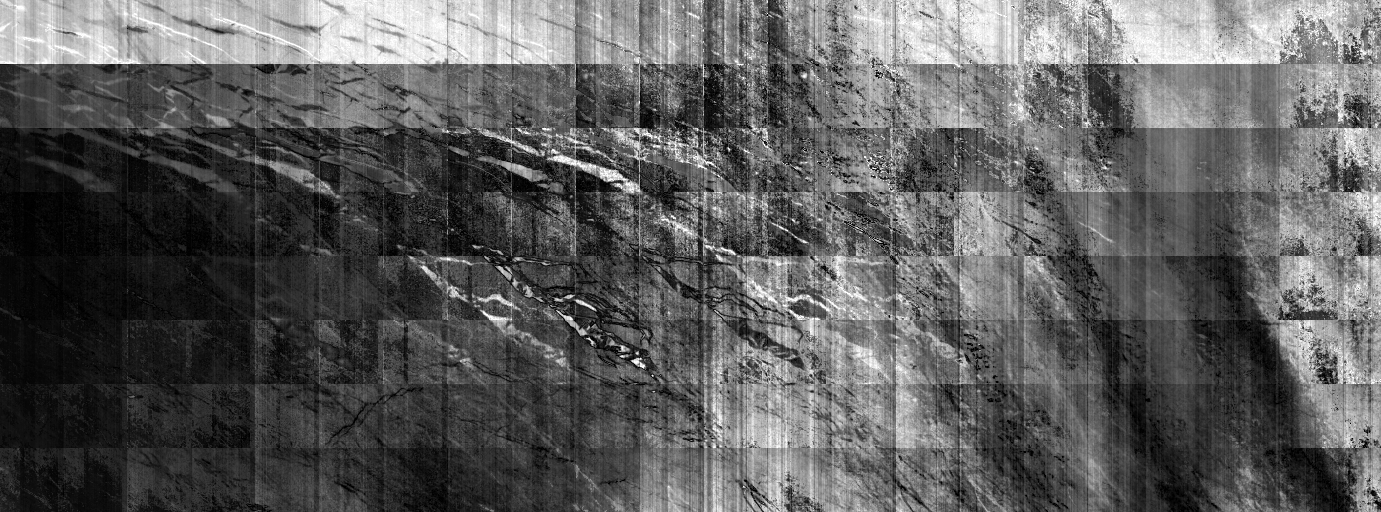

In [95]:
## scale data to range(0,1)

scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(rough_2d_arr)
y_predict_2d_scaled = scaler.transform(rough_2d_arr)

# # Checking reconstruction
# X_rec = scaler.inverse_transform(X_scaled)

pil_im = Image.fromarray(np.uint8(y_predict_2d_scaled*255))
display(pil_im)

# plot toa-refl.dat original file for comparison

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))


In [97]:
## sample block

da_r = "toa_refl_P186_O086895_B008_da_red.dat"

da_r_arr = np.fromfile(os.path.join(toa_refl_dir, da_r), dtype=np.double)[0:1048576].reshape((512,2048))



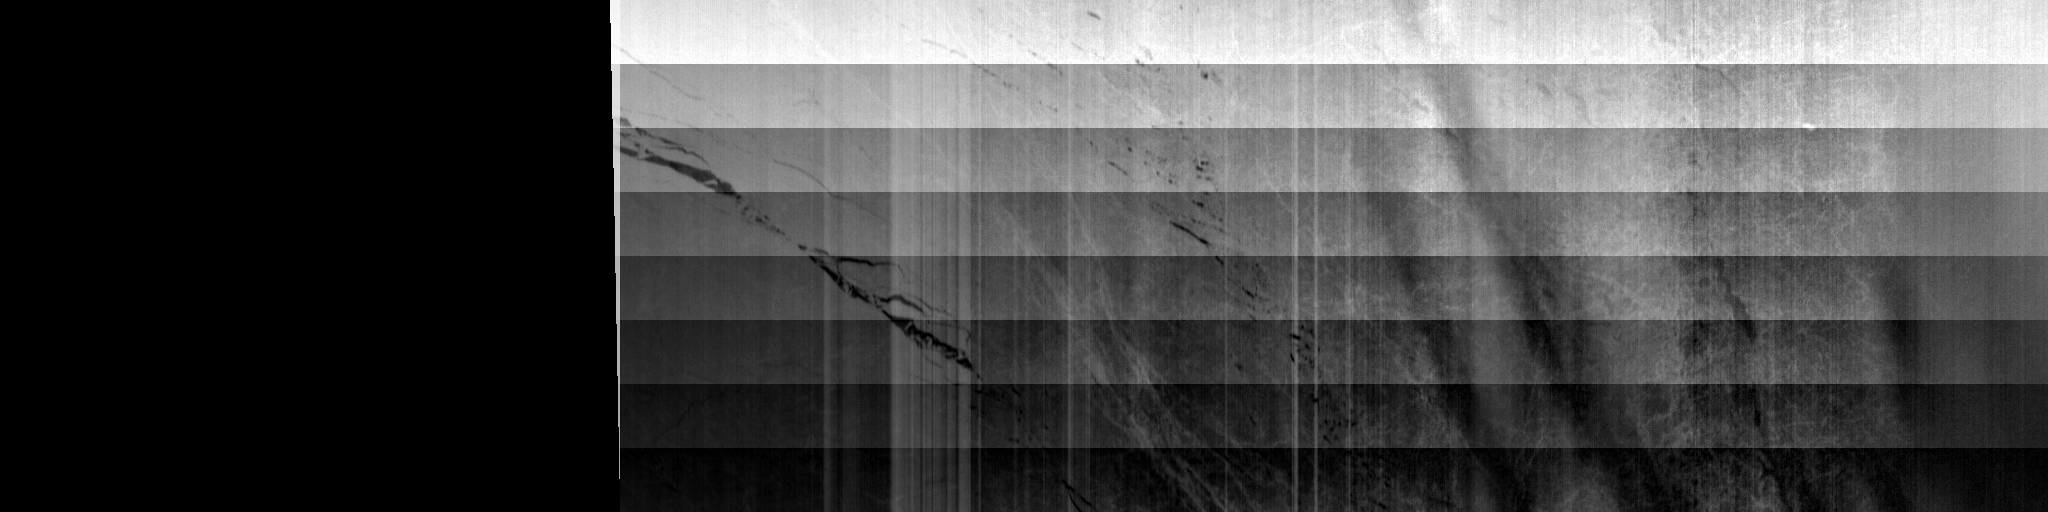

(512, 2048)
-1.0
2.4791298592615187


In [98]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler_toa_da = scaler.fit(da_r_arr)
toa_refl_pos_scaled_da = scaler_toa_da.transform(da_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_da*255))
display(pil_im2)
print(da_r_arr.shape)
print(da_r_arr.min())
# print(np.meadian(da_r_arr))
print(da_r_arr.max())

In [ ]:
# scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa_da_trim = scaler.fit(da_noBlack_trim)
toa_refl_pos_scaled_da_sliced = scaler_toa_da_trim.transform(da_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_da_sliced*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(ca_r_arr)
toa_refl_pos_scaled_ca = scaler.transform(ca_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_ca*255))
display(pil_im2)

In [ ]:


scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(ca_noBlack_trim)
toa_refl_pos_scaled_ca = scaler.transform(ca_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_ca*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(ba_r_arr)
toa_refl_pos_scaled_ba = scaler.transform(ba_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_ba*255))
display(pil_im2)

In [ ]:

scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(ba_noBlack_trim)
toa_refl_pos_scaled_ba = scaler.transform(ba_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_ba*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(aa_r_arr)
toa_refl_pos_scaled_aa = scaler.transform(aa_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_aa*255))
display(pil_im2)

In [ ]:


scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(aa_noBlack_trim)
toa_refl_pos_scaled_aa = scaler.transform(aa_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_aa*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(an_r_arr)
toa_refl_pos_scaled_an = scaler.transform(an_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_an*255))
display(pil_im2)

In [ ]:


scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(an_noBlack_trim)
toa_refl_pos_scaled_an = scaler.transform(an_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_an*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(af_r_arr)
toa_refl_pos_scaled_af = scaler.transform(af_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_af*255))
display(pil_im2)

In [ ]:


scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(af_noBlack_trim)
toa_refl_pos_scaled_af = scaler.transform(af_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_af*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(bf_r_arr)
toa_refl_pos_scaled_bf = scaler.transform(bf_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_bf*255))
display(pil_im2)

In [ ]:


scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(bf_noBlack_trim)
toa_refl_pos_scaled_af = scaler.transform(bf_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_af*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(cf_r_arr)
toa_refl_pos_scaled_cf = scaler.transform(cf_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_cf*255))
display(pil_im2)

In [ ]:
scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(cf_noBlack_trim)
toa_refl_pos_scaled_cf = scaler.transform(cf_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_cf*255))
display(pil_im2)

In [ ]:
df_r_arr.min()

In [ ]:
# scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa_df = scaler.fit(df_r_arr)
toa_refl_pos_scaled_df = scaler_toa_df.transform(df_r_arr)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_df*255))
display(pil_im2)


In [ ]:



scaler_toa = MinMaxScaler(feature_range=(0,1))
scaler_toa = scaler.fit(df_noBlack_trim)
toa_refl_pos_scaled_df = scaler.transform(df_noBlack_trim)

pil_im2 = Image.fromarray(np.uint8(toa_refl_pos_scaled_df*255))
display(pil_im2)


## write the 2D array as tif image

In [ ]:
# ##- create PIL image from roughness array 2D w/ negative values
# from PIL import Image

# predicted_roughness_img = Image.fromarray(y_predict_2d)


# ##- save roughness PIL image on disc
# image_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research"

# path_label = "P186"
# block_label = "B030"

# out_img_label = path_label+'_'+block_label+".tif"  # this image format supports saving neg- values in image

# out_img_fullpath = os.path.join(image_dir, out_img_label)

# predicted_roughness_img.save(out_img_fullpath)  # note: PIL is able to save neg. pixel values in .tif file


# ---> QUESTIONS:
Q1- how build and train an algorithm (DT, ANN, KNN, MLReg, SVR) correctly?

Q2- what are parameters and hyper-parametrs of an algorithm? 

Q3- how fine-tune hyper-parameters? which parameter is most affective in fine-tuning an algorithm?

Q4- how plot the model (regression line/ decision boundary)? and visually check performance score/skill/accuracy of regression model? how plot a model like DT?

Q5- how an algorithm learns from data?

Q6- if an algorithm can extrapolate on unseen data?

Q7- if an algorithm returns a function or shape that is able to extrapolate?

Q8- if an algorithm can be influenced by outliers?

-------------------------------------------
-------------------------------------------

Other Questions:


Q- what is generalization step? generalization test with a MISR block - statistical metrics?

test generalization step to check how our model performs on unseen/new data (in real world)
we need to select a metric to score it to be able to compare the perfoamnce of different models

Q- what is a good metric to compare perfomance of different models? score? R2? (especially with old method in Anne's paper and also with baseline?)